<a href="https://colab.research.google.com/github/lgavmarin/DataViz/blob/master/ex10_ARIMA_sunspots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [0]:
#DATA

url = 'https://spdf.gsfc.nasa.gov/pub/data/omni/low_res_omni/omni_yearly.dat'
df2 = pd.read_csv(url, sep="\s+", header=None, usecols=[0,8,22,23,27,39, 42,54],
                  names=['year', 'B_field', 'proton_temperature', 'proton_density',
                         'alpha_proton','sunspots','proton_flux','mach_number'])

#print(df2)

df2s=df2[df2['year']>1976]
df2s=df2s[df2s['proton_flux']< 999999.99]


#q = df2.quantile(0.999)
#df2c = df2[df2 < q]

df2s


,year,B_field,proton_temperature,proton_density,alpha_proton,sunspots,proton_flux,mach_number
14,1977,5.9,104352.0,8.9,0.039,39,16.20,5.8
15,1978,7.2,112892.0,7.9,0.043,131,269.45,5.4
16,1979,7.6,106917.0,7.0,0.054,220,122.51,4.9
17,1980,7.0,82221.0,7.0,0.063,219,49.84,5.0
18,1981,7.9,109426.0,7.1,0.064,199,241.23,5.0
19,1982,8.8,139668.0,8.4,0.061,162,203.59,5.3
20,1983,8.0,144139.0,8.0,0.053,91,47.23,5.5
21,1984,7.8,148798.0,8.0,0.051,60,67.40,5.5
22,1985,5.9,123895.0,8.7,0.035,21,17.29,6.1
23,1986,5.8,108923.0,8.5,0.039,15,33.92,6.3


In [0]:
data2=df2s #df2s

data2.year = data2.year.astype(int)

print(data2)

    year  B_field  proton_temperature  ...  sunspots  proton_flux  mach_number
14  1977      5.9            104352.0  ...        39        16.20          5.8
15  1978      7.2            112892.0  ...       131       269.45          5.4
16  1979      7.6            106917.0  ...       220       122.51          4.9
17  1980      7.0             82221.0  ...       219        49.84          5.0
18  1981      7.9            109426.0  ...       199       241.23          5.0
19  1982      8.8            139668.0  ...       162       203.59          5.3
20  1983      8.0            144139.0  ...        91        47.23          5.5
21  1984      7.8            148798.0  ...        60        67.40          5.5
22  1985      5.9            123895.0  ...        21        17.29          6.1
23  1986      5.8            108923.0  ...        15        33.92          6.3
24  1987      6.2             98155.0  ...        34         4.80          5.9
25  1988      7.3            111753.0  ...       123

In [0]:
import datetime as dt
#print(data.describe()) #Describing a DataFrame. By default only numeric fields are returned.

#For ARIMA will need time series in datetimeindex format
#https://stackoverflow.com/questions/46658232/pandas-convert-column-with-year-integer-to-datetime

data2['Timestamp']=pd.to_datetime(data2.year, format='%Y') #format="%m/%d/%Y %I:%M:%S %p" ) # ) 
print(data2)

data2 = data2.set_index('Timestamp')
data2.index

    year  B_field  proton_temperature  ...  proton_flux  mach_number  Timestamp
14  1977      5.9            104352.0  ...        16.20          5.8 1977-01-01
15  1978      7.2            112892.0  ...       269.45          5.4 1978-01-01
16  1979      7.6            106917.0  ...       122.51          4.9 1979-01-01
17  1980      7.0             82221.0  ...        49.84          5.0 1980-01-01
18  1981      7.9            109426.0  ...       241.23          5.0 1981-01-01
19  1982      8.8            139668.0  ...       203.59          5.3 1982-01-01
20  1983      8.0            144139.0  ...        47.23          5.5 1983-01-01
21  1984      7.8            148798.0  ...        67.40          5.5 1984-01-01
22  1985      5.9            123895.0  ...        17.29          6.1 1985-01-01
23  1986      5.8            108923.0  ...        33.92          6.3 1986-01-01
24  1987      6.2             98155.0  ...         4.80          5.9 1987-01-01
25  1988      7.3            111753.0  .

DatetimeIndex(['1977-01-01', '1978-01-01', '1979-01-01', '1980-01-01',
               '1981-01-01', '1982-01-01', '1983-01-01', '1984-01-01',
               '1985-01-01', '1986-01-01', '1987-01-01', '1988-01-01',
               '1989-01-01', '1990-01-01', '1991-01-01', '1992-01-01',
               '1993-01-01', '1994-01-01', '1995-01-01', '1996-01-01',
               '1997-01-01', '1998-01-01', '1999-01-01', '2000-01-01',
               '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01'],
              dtype='datetime64[ns]', name='Timestamp', freq=None)

Timestamp
1977-01-01     39
1978-01-01    131
1979-01-01    220
1980-01-01    219
1981-01-01    199
1982-01-01    162
1983-01-01     91
1984-01-01     60
1985-01-01     21
1986-01-01     15
1987-01-01     34
1988-01-01    123
1989-01-01    211
1990-01-01    192
1991-01-01    203
1992-01-01    133
1993-01-01     76
1994-01-01     45
1995-01-01     25
1996-01-01     12
1997-01-01     29
1998-01-01     88
1999-01-01    136
2000-01-01    174
2001-01-01    170
2002-01-01    164
2003-01-01     99
2004-01-01     65
2005-01-01     46
Name: sunspots, dtype: int64


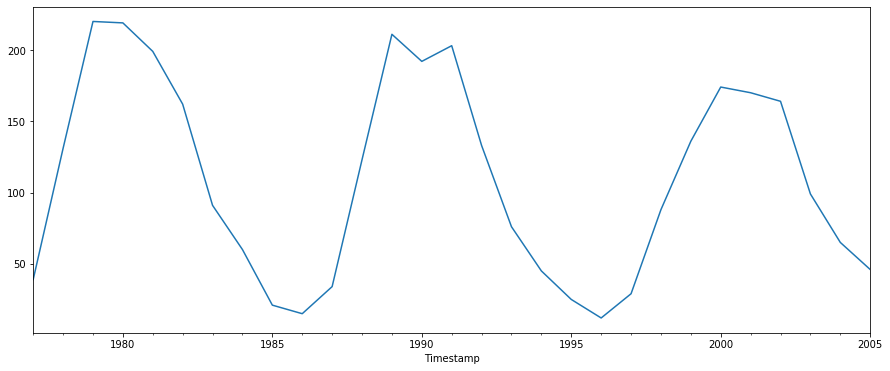

In [0]:
# Source: #https://www.kdnuggets.com/2018/09/end-to-end-project-time-series-analysis-forecasting-python.html

import matplotlib.pyplot as plt
import matplotlib as mlt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

#y = agriculture['rate'].resample('MS').mean()
y = data2['sunspots']  #.resample('MS').mean()
#y['2000':]
print(y)
y.plot(figsize=(15, 6))
plt.show()

# I am trying to use dataframe.resample('MS').asfreq() to identify the missing months and insert them into my list


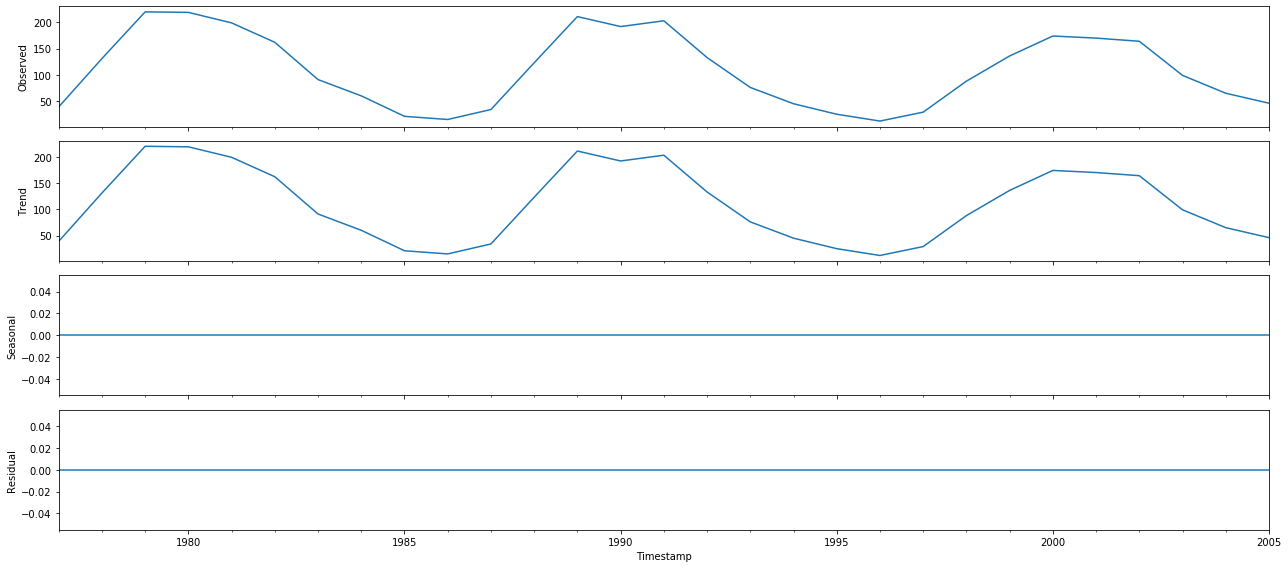

In [0]:
#READ THIS:
#https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

#y(t) = Level + Trend + Seasonality + Noise
# ARIMA: AutoRegressive Integrated Moving Average

decomposition = sm.tsa.seasonal_decompose(y, model='additive') #, freq=1)
fig = decomposition.plot()
plt.show()

In [0]:
import itertools
import warnings


p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] 

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [0]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:354.8098113162233
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:184.4783296177738
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:197.61720722616187
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:59.32077973795417
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:313.5607103088746
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:164.98178051677948
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:188.95093345525768
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:59.52303848896643
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:285.1877049566557
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:164.025971793666
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:164.87441166178675
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:46.0770903503747
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:266.0711186144219
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:152.49166786075932
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:163.080670017434
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:46.960725134769646
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:299.612190475822
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:174.49306368121785
ARIMA(1

In [0]:
#ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:46.0770903503747
#ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:37.79023131924515   <= picked these parameters!

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),   
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=True, #False,   
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5318      0.291      1.828      0.068      -0.038       1.102
ar.S.L12      -0.1351      0.519     -0.260      0.795      -1.152       0.882
sigma2      2573.5194   1232.108      2.089      0.037     158.633    4988.406


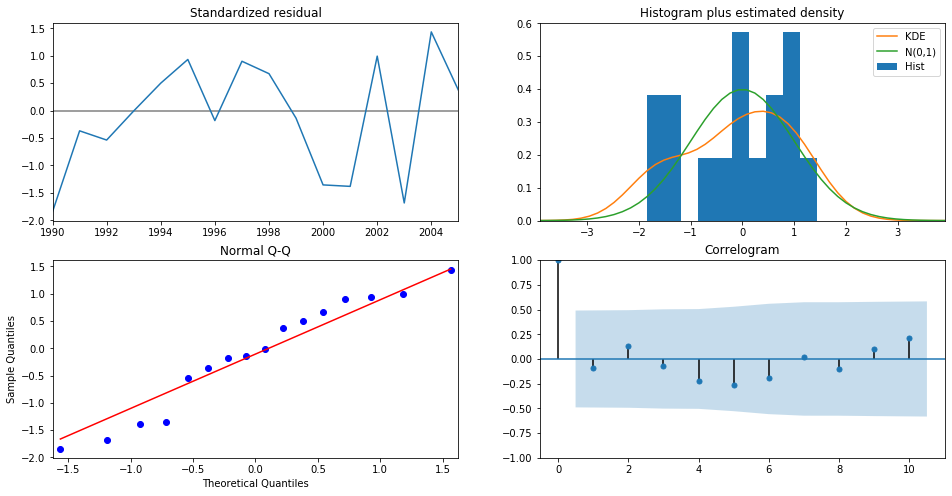

In [0]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.



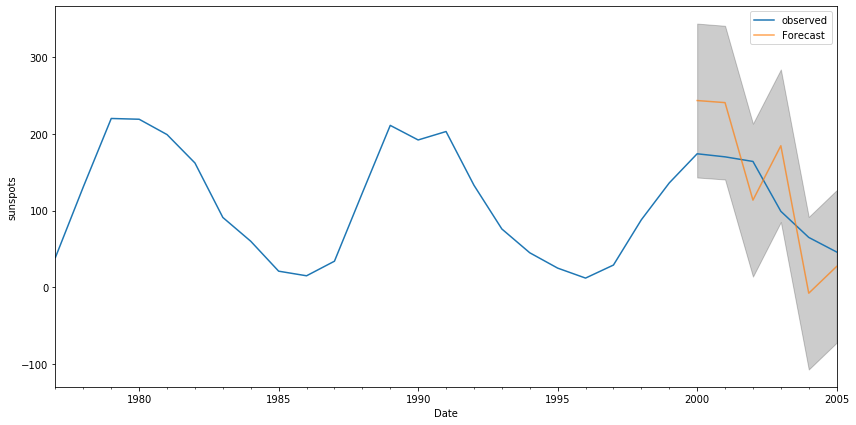

In [0]:
 ##https://www.kdnuggets.com/2018/09/end-to-end-project-time-series-analysis-forecasting-python.html
 
pred = results.get_prediction(start=pd.to_datetime('2000-01-01'), dynamic=False)

pred_ci = pred.conf_int()

ax = y['1977':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('sunspots')
plt.legend()


plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing a downward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

In [0]:
y_forecasted = pred.predicted_mean
y_truth = y['2000-01-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 4215.62


In [0]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 64.93


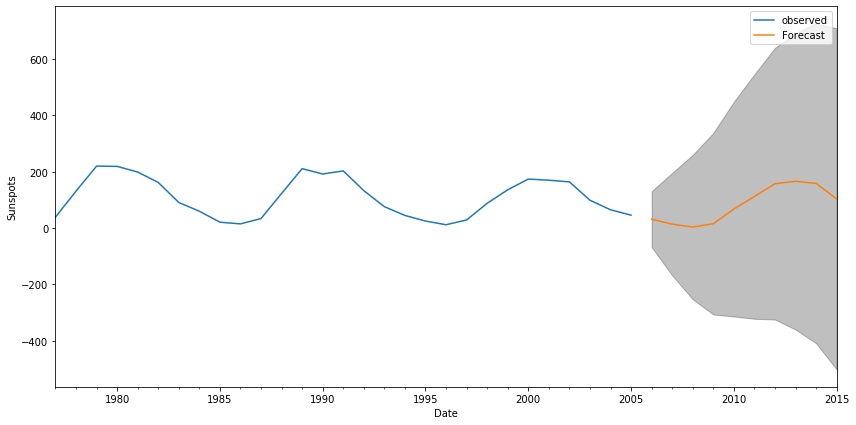

In [0]:
pred_uc = results.get_forecast(steps=10) #100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sunspots')

plt.legend()
plt.show()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 22.


Text(0.5, 1, 'Prophet forecast')

<Figure size 1296x432 with 0 Axes>

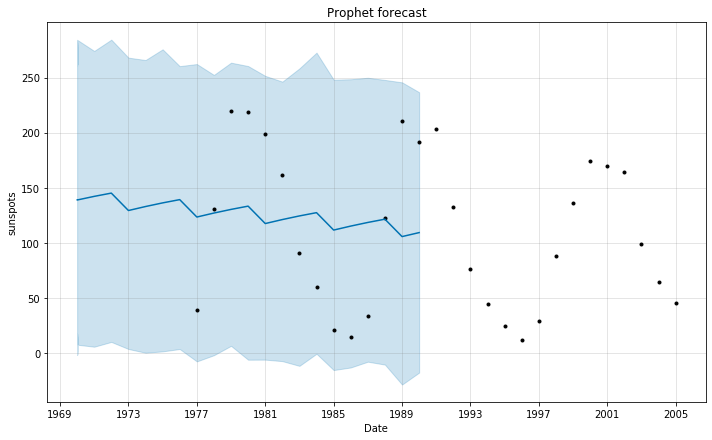

In [0]:
from fbprophet import Prophet

data3=data2[['year', 'sunspots']]
data3 = data3.rename(columns={'year': 'ds', 'sunspots': 'y'})
data3_model = Prophet(interval_width=0.95)
data3_model.fit(data3)

#http://benalexkeen.com/resampling-time-series-data-with-pandas/
data3_forecast = data3_model.make_future_dataframe(periods=20, freq='AS') #60, freq='MS')  #freq='1M')
data3_forecast = data3_model.predict(data3_forecast)

plt.figure(figsize=(18, 6))
data3_model.plot(data3_forecast, xlabel = 'Date', ylabel = 'sunspots')
plt.title('Prophet forecast')